<h1>Criminal Dataset</h1>

<p>
Data period: [2015-01-02-2020-06-15]
    
    
Is dataset cleaned: True

To explore this dataset, first, I would like to group different questions we can answer:

- 1. Are there any relationship between race and manner of death?
- 2. Is there more probabilities to die having a body camera?
- 3. Is there any coincidence to being shot for being black/gender
- 4. Are there a period when there are more criminal activity
- 5. States/Races with more criminal activity
</p>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [21]:
cols_name = ["id","name","date","manner_of_death","armed","age","gender","race","city","state","signs_of_mental_illness","threat_level","flee","body_camera","arms_category"]
df = pd.read_csv("shootings.csv", usecols=cols_name, parse_dates=['date'])
df = df.drop(["id"], axis=1)

In [4]:
# We do not have any NaN value, the datased was cleansed before
df.isna().sum()

name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [5]:
df.head()
# print('=======')
# print(df.describe())
# print('=======')
# print(df.info())

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


<b>Criminal activity by year<b>

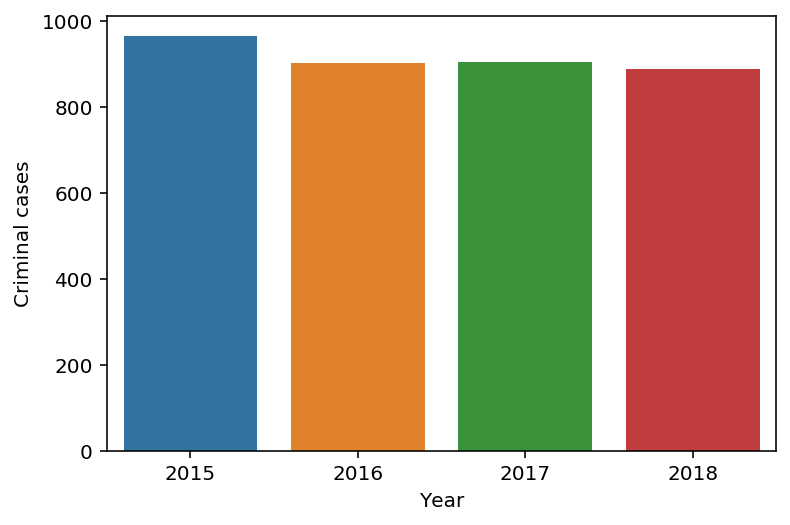

In [121]:
# Is there a year with more criminal activity since 5 years ago?

# Create a copy and get only entire years
ca_bytime = df.loc[:, 'date']
ca_bytime = ca_bytime.dt.year
ca_bytime = ca_bytime.loc[ca_bytime < 2019]

ax = sns.countplot(x=ca_bytime)
ax.set(xlabel='Year', ylabel='Criminal cases')
plt.show()
# ca_bytime.plot()

<b>Criminal activity by month<b>

In [34]:
# Create a copy and get only months from 2015 (maybe better if we add every year)
ca_byyear = df[['date']].copy()
ca_byyear["year"] = ca_byyear["date"].dt.year
ca_byyear = ca_byyear.loc[ca_byyear["year"] < 2020]
ca_byyear["month"] = ca_byyear["date"].dt.month
graph = ca_byyear.groupby(["month", "year"]).count().unstack(level = 1)
graph

date                    
year  2015 2016 2017 2018 2019
month                         
1       75   80   91   96   81
2       77   85   97   74   68
3       91   90   74   99   76
4       83   73   65   88   63
5       69   69   68   70   64
6       63   87   80   70   77
7      100   71   91   82   69
8       91   77   78   68   57
9       80   73   66   50   59
10      78   71   81   64   73
11      76   68   76   63   71
12      82   60   39   64  100

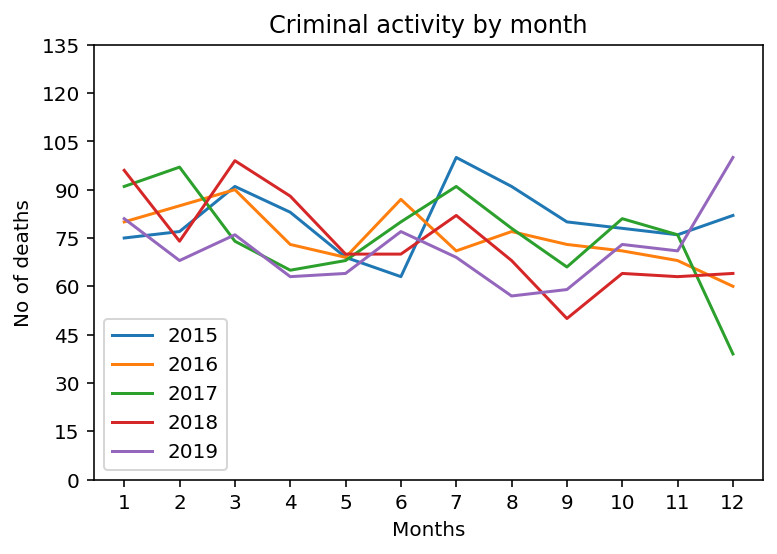

In [47]:

# ax = sns.lineplot(x='month', data=graph)
# ax.set(xlabel='Month', ylabel='Criminal cases in 2015')
# plt.show()
# ca_byyear.head()

plt.plot(graph)
plt.title("Criminal activity by month")
plt.xlabel("Months")
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(0, 150, 15))
plt.ylabel("No of deaths")
plt.legend(["2015","2016","2017","2018","2019","2020"])
plt.show()

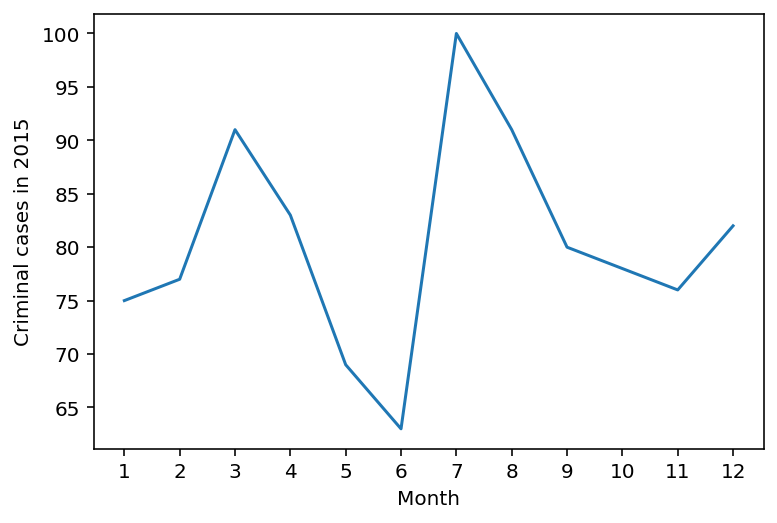

In [161]:
y = np.array(ca_byyear.value_counts(sort=False))
x = np.arange(1,13)
ax = sns.lineplot(x, y)
ax.set(xlabel='Month', ylabel='Criminal cases in 2015')
plt.xticks(x)
plt.show()

In [12]:
df['date'].min() + ' ' + df['date'].max()

'2015-01-02 2020-06-15'

In [158]:
ca_byyear.value_counts()

7     100
8      91
3      91
4      83
12     82
9      80
10     78
2      77
11     76
1      75
5      69
6      63
Name: date, dtype: int64